In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from tools.getNBA_data_webscraping import getData

In [89]:

#df = getData('2023-24') 
#df24_25 = getData('2024-25') 

In [90]:
df = pd.read_csv("data/nba_2023-24.csv")
df24_25 = pd.read_csv("data/nba_2024-25.csv") 

In [91]:
df
   

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Atlanta Hawks,82,36,46,0.439,48.4,118.3,43.0,92.5,46.5,...,32.2,44.7,26.6,13.5,7.5,4.5,5.6,18.6,19.4,-2.2
1,Boston Celtics,82,64,18,0.780,48.4,120.6,43.9,90.2,48.7,...,35.6,46.3,26.9,11.9,6.8,6.6,3.7,16.2,17.3,11.3
2,Brooklyn Nets,82,32,50,0.390,48.3,110.4,40.7,89.1,45.6,...,32.6,44.1,25.6,13.1,6.8,5.2,5.0,18.5,18.2,-2.9
3,Charlotte Hornets,82,21,61,0.256,48.1,106.6,40.0,87.0,46.0,...,31.0,40.3,24.8,13.8,6.9,4.5,4.8,18.0,17.5,-10.2
4,Chicago Bulls,82,39,43,0.476,48.7,112.3,42.0,89.5,47.0,...,32.6,43.8,25.0,12.2,7.8,4.8,4.9,18.8,18.8,-1.4
5,Cleveland Cavaliers,82,48,34,0.585,48.3,112.6,41.8,87.2,47.9,...,33.4,43.3,28.0,13.6,7.4,4.6,5.0,17.5,18.7,2.4
6,Dallas Mavericks,82,50,32,0.610,48.1,117.9,43.1,89.7,48.1,...,33.2,42.9,25.7,12.5,6.9,5.0,4.0,18.3,20.3,2.2
7,Denver Nuggets,82,57,25,0.695,48.1,114.9,44.0,88.8,49.6,...,33.7,44.4,29.5,12.6,7.1,5.6,4.8,18.2,17.9,5.3
8,Detroit Pistons,82,14,68,0.171,48.2,109.9,40.9,88.2,46.3,...,32.8,43.3,25.5,15.2,6.5,4.7,6.0,20.6,17.8,-9.1
9,Golden State Warriors,82,46,36,0.561,48.4,117.8,43.7,91.6,47.7,...,34.6,46.7,29.3,14.3,7.0,4.6,5.0,19.5,17.9,2.6


In [92]:
df.head(3)
df.columns

Index(['TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-'],
      dtype='object')

In [93]:
df = df.drop(['TEAM', 'GP', 'L', 'WIN%','MIN', 'FG%','3P%','FT%', '+/-'], axis=1)
df = df.astype(float)
cols = df.columns
df.describe()

,W,PTS,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,41.000000,114.220000,42.176667,88.903333,12.840000,35.106667,17.026667,21.723333,10.543333,32.986667,43.546667,26.673333,13.596667,7.476667,5.146667,5.133333,18.733333,18.726667
std,13.411266,4.254847,1.717995,2.073558,1.217572,2.880605,1.368849,1.504174,1.153311,1.240337,1.459507,1.854711,1.060411,0.555029,0.794695,0.735003,1.308944,0.854979
min,14.000000,105.800000,38.400000,84.900000,11.000000,31.200000,14.500000,18.400000,8.200000,30.100000,40.300000,23.100000,11.900000,6.500000,3.400000,3.700000,15.600000,17.300000
25%,31.250000,112.150000,41.300000,87.425000,12.100000,32.800000,15.850000,20.500000,9.725000,31.975000,42.700000,25.125000,12.750000,7.025000,4.600000,4.625000,18.050000,18.025000
50%,46.500000,114.450000,42.150000,89.200000,12.600000,34.750000,17.000000,21.650000,10.500000,33.100000,43.450000,26.600000,13.350000,7.500000,5.000000,5.000000,18.600000,18.700000
75%,49.000000,117.500000,43.100000,90.125000,13.300000,36.775000,18.250000,22.875000,11.150000,33.850000,44.200000,27.975000,14.275000,7.800000,5.825000,5.750000,19.650000,19.200000
max,64.000000,123.300000,47.000000,92.700000,16.500000,42.500000,19.500000,24.400000,12.700000,35.600000,46.700000,30.800000,15.700000,8.500000,6.600000,6.500000,21.400000,20.900000


In [94]:
scale = StandardScaler()
df = pd.DataFrame(scale.fit_transform(df))
df.columns = cols

In [95]:
# df.hist(figsize=(12, 8))  
# plt.tight_layout()
# plt.show()

In [96]:
# fig, axes = plt.subplots(6,3,figsize=(20, 18))
# axes = axes.flatten()

# for i, col in enumerate(cols[1:]):
#     sns.regplot(data=df, x=col, y='W',ax=axes[i])
#     axes[i].set_title(f"W~{col}")
#     axes[i].set_xlabel('')

# plt.tight_layout()
# plt.show()

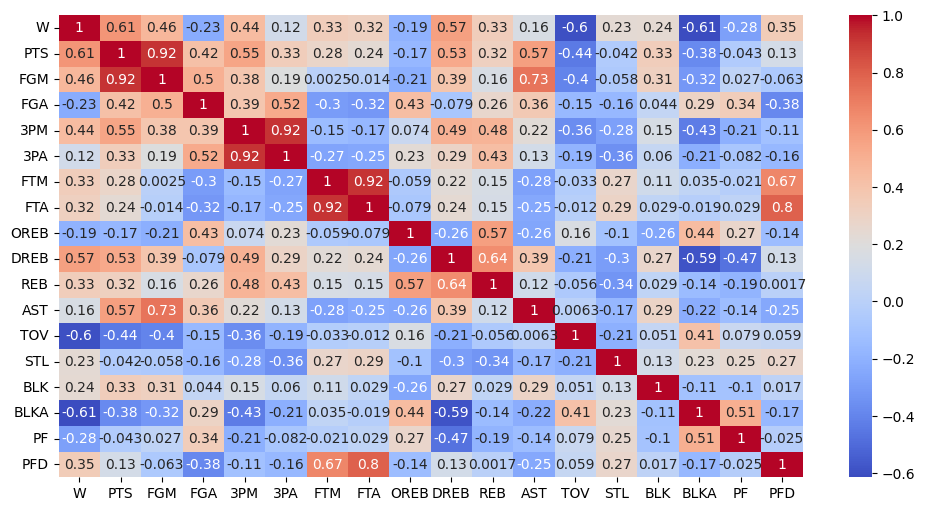

In [97]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [98]:
X = df.loc[:, 'PTS': 'PFD']
y = df['W']

Delete colums with high correlation > 0.8

In [99]:
X = X.drop(columns=['PTS', '3PM', 'FTM'])

[Interpreting linear regression summary from statsmodels](https://www.adrian.idv.hk/2021-07-16-statsmodels/#:~:text=t%3A%20Coef%20divided%20by%20Std%20Err%2C%20i.e.%2C%20the,its%20magnitude%20is%20large%20with%20small%20standard%20error)

In [100]:
X2 = sm.add_constant(X)
model  = sm.OLS(y, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     18.91
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           5.05e-07
Time:                        15:09:48   Log-Likelihood:                 1.3179
No. Observations:                  30   AIC:                             27.36
Df Residuals:                      15   BIC:                             48.38
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.388e-17      0.060   2.32e-16      1.0

In [101]:
X = X.drop(['AST', 'PF'], axis=1)

X2 = sm.add_constant(X)
model  = sm.OLS(y, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     24.95
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           2.03e-08
Time:                        15:09:48   Log-Likelihood:                 1.2904
No. Observations:                  30   AIC:                             23.42
Df Residuals:                      17   BIC:                             41.63
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.388e-17      0.056   2.47e-16      1.0

In [102]:
X = X.drop(['REB'], axis=1)

X2 = sm.add_constant(X)
model  = sm.OLS(y, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           4.62e-09
Time:                        15:09:48   Log-Likelihood:                0.87647
No. Observations:                  30   AIC:                             22.25
Df Residuals:                      18   BIC:                             39.06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.388e-17      0.055   2.51e-16      1.0

In [103]:
X = X.drop(['BLKA'], axis=1)

X2 = sm.add_constant(X)
model  = sm.OLS(y, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     31.86
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           9.26e-10
Time:                        15:09:48   Log-Likelihood:                0.59265
No. Observations:                  30   AIC:                             20.81
Df Residuals:                      19   BIC:                             36.23
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.388e-17      0.054   2.55e-16      1.0

In [104]:
X = X.drop(['FTA'], axis=1)

X2 = sm.add_constant(X)
model  = sm.OLS(y, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     33.37
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           4.02e-10
Time:                        15:09:48   Log-Likelihood:               -0.96420
No. Observations:                  30   AIC:                             21.93
Df Residuals:                      20   BIC:                             35.94
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.388e-17      0.056   2.48e-16      1.0

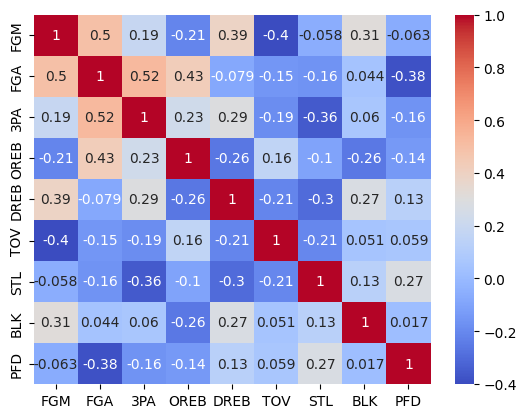

In [105]:
sns.heatmap(X.corr(), cmap='coolwarm', annot=True)
plt.show()

In [106]:
model = LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [107]:
coef_data =pd.DataFrame(model.coef_, X.columns, columns = ['Coefficients'])
coef_data['Coefficients'].sort_values()


FGA    -0.937891
TOV    -0.385095
BLK     0.087959
PFD     0.091566
DREB    0.176259
STL     0.225783
3PA     0.335191
OREB    0.457307
FGM     0.731234
Name: Coefficients, dtype: float64

In [108]:
y_pred = model.predict(X)

In [109]:
rmse = root_mean_squared_error(y,y_pred)
r2 = r2_score(y, y_pred)
print(rmse, r2)

0.24987400551104547 0.937562981369866


In [110]:
df_residuals = pd.concat([y, pd.Series(y_pred), pd.Series(y-y_pred)], axis=1)
df_residuals.columns = ['observed', 'predicted', 'residual']
df_residuals.head(2)

,observed,predicted,residual
0,-0.379194,-0.269949,-0.109245
1,1.744294,1.820352,-0.076058


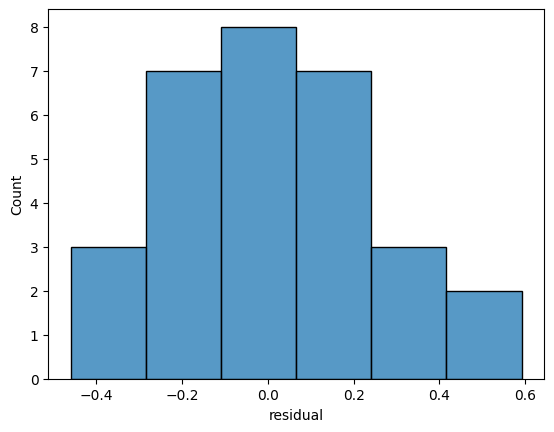

In [111]:
sns.histplot(data=df_residuals,x='residual') # bins is automatically calculated with Sturge’s Rule K = 1 + 3.322 * log(N) = 1 + 3.322 * log(30) => 6 
plt.show()

In [112]:
df_residuals.describe().round(2) # mean(residual) should be equal 0

,observed,predicted,residual
count,30.00,30.00,30.00
mean,0.00,-0.00,0.00
std,1.02,0.98,0.25
min,-2.05,-2.11,-0.46
25%,-0.74,-0.66,-0.17
50%,0.42,0.22,-0.01
75%,0.61,0.70,0.11
max,1.74,1.82,0.59


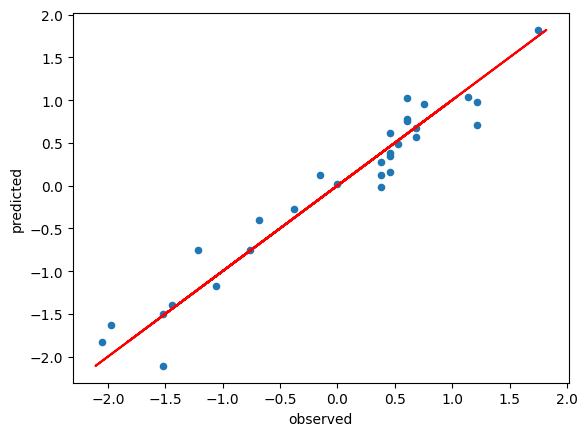

In [113]:
df_residuals.plot.scatter(x='observed', y='predicted')
plt.plot(df_residuals['predicted'], df_residuals['predicted'], color='red')
plt.show()

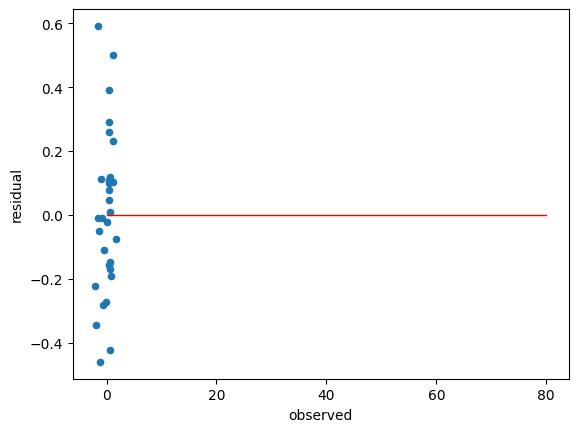

In [114]:
df_residuals.plot.scatter(x='observed', y='residual')
plt.plot([0,80],[0,0], color='red', linewidth=1)
plt.show()

In [115]:
df24_25 = df24_25.drop(['TEAM'], axis=1)


In [116]:
df24_25 = df24_25.astype(float)
df24_25_colsList = df24_25.columns

In [117]:
scale24_25 = StandardScaler()
df24_25 = pd.DataFrame(scale24_25.fit_transform(df24_25))
df24_25.columns = df24_25_colsList

In [118]:
X24_25 = df24_25[X.columns]
y24_25 = df24_25['W'] 

In [119]:
y24_25_pred = model.predict(X24_25)
y24_25_pred

array([-0.08953673,  1.45460023, -0.91025896, -1.51238284, -0.6734144 ,
        1.29762035,  0.14901634,  0.79207644, -0.08445559,  0.55754625,
       -0.04433956,  0.37681628,  0.55022361,  0.6135956 ,  0.3228893 ,
       -0.08460212,  0.52816605,  0.66455465, -0.89671103,  0.26555461,
        1.27039394,  0.21329714, -0.26489406,  0.2773472 , -0.64424727,
       -0.05975916, -0.00485874, -1.23086767, -1.06460088, -1.76876898])

In [120]:
rmse24_25 = root_mean_squared_error(y24_25,y24_25_pred)
r2_24_25 = r2_score(y24_25,y24_25_pred)
print(rmse24_25, r2_24_25)

0.43351173929388875 0.8120675718943875


In [121]:
df24_25_residuals = pd.concat([y24_25, pd.Series(y24_25_pred), pd.Series(y24_25-y24_25_pred)], axis=1)
df24_25_residuals.columns = ['observed', 'predicted', 'residual']
df24_25_residuals.head(2)

,observed,predicted,residual
0,-0.076161,-0.089537,0.013376
1,1.523216,1.454600,0.068615


In [122]:
df24_25_residuals.describe().round(2)

,observed,predicted,residual
count,30.00,30.00,30.00
mean,-0.00,-0.00,0.00
std,1.02,0.81,0.44
min,-1.83,-1.77,-1.03
25%,-0.50,-0.55,-0.22
50%,-0.04,0.07,0.01
75%,0.69,0.54,0.30
max,2.06,1.45,0.88


In [124]:
from sklearn.model_selection import train_test_split
import numpy as np

idx = np.arange(X.shape[0])

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, idx, test_size=.2, random_state=42)

In [127]:
print(idx_train.shape)
print(idx_test.shape)

(24,)
(6,)


In [ ]:
split_index = [-1 if i in idx_train else 0 for i in idx]


[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 0,
 -1,
 -1]

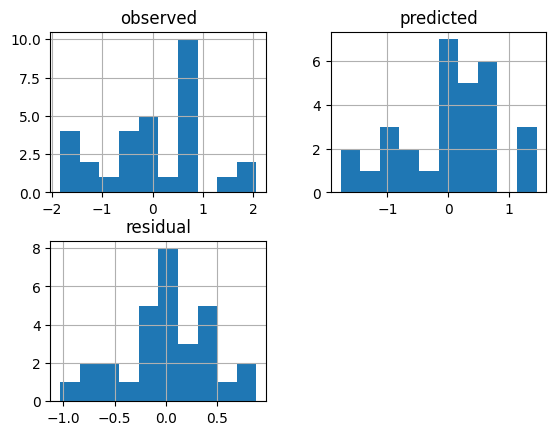

In [123]:
df24_25_residuals.hist()
plt.show()